<a href="https://colab.research.google.com/github/Panos1992/NetLoad_Optimization_residential/blob/main/NetLoad_Optim_BAT_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# Change to your desired directory
#desired_path = '/content/'
desired_path = '/content/drive/MyDrive/Housing_data'
os.chdir(desired_path)
# Verify the current working directory
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /content/drive/MyDrive/Housing_data


In [ ]:
# Define the file path
#File = 'Data_Households_SmartPV'
#File = 'Average_household_energy'

#avg_energy_df = pd.read_csv('Average_household_energy.csv')
raw_df = pd.read_csv('Data_Households_SmartPV.csv')

raw_df['Timestamp'] = pd.to_datetime(raw_df['Timestamp'])
raw_df .info()
print(raw_df.head())  # This will print the first 5 rows of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187562 entries, 0 to 1187561
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Timestamp    1187562 non-null  datetime64[ns]
 1   NM_meter     1187562 non-null  int64         
 2   Import       1187562 non-null  float64       
 3   Export       1187562 non-null  float64       
 4   PV_meter     1187562 non-null  int64         
 5   Production   1187562 non-null  float64       
 6   Consumption  1187562 non-null  float64       
 7   NetLoad      1187562 non-null  float64       
 8   day          1187562 non-null  int64         
 9   day_of_week  1187562 non-null  int64         
 10  month        1187562 non-null  int64         
 11  year         1187562 non-null  int64         
 12  hour_of_day  1187562 non-null  int64         
 13  quarter      1187562 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 126.8 MB


# Data Pre-Processing:
Make the appropriate dataframes
and get the selected arrays

We can take average data or aggregated,
or even individual house, as case study




In [ ]:
### Yearly Average Energy
yearly_avg_df = raw_df.groupby(['Timestamp', 'month']).mean().reset_index()   # Average data
#yearly_avg_f = raw_df.groupby(['Timestamp', 'month']).sum().reset_index()    # Aggregate data
yearly_avg_df.info()
yearly_avg_df.head()

### Monthly Avg
#monthly_df = raw_df.groupby(['month','PV_meter']).mean().reset_index()
monthly_df = raw_df.groupby(['month']).mean()
months_of_the_year = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#print(months_of_the_year)

### Daily Avg
hourly_df = raw_df.groupby(['hour_of_day']).mean()

### Weekday / Weekend Avg
#raw_df2 = raw_df
#raw_df2['day_type'] = raw_df2['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
#weekly_df = raw_df2.groupby(['quarter','day_type']).mean()
weekly_df = raw_df.groupby(['day_of_week']).mean()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week = ["weekday","weekend"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    17564 non-null  datetime64[ns]
 1   month        17564 non-null  int64         
 2   NM_meter     17564 non-null  float64       
 3   Import       17564 non-null  float64       
 4   Export       17564 non-null  float64       
 5   PV_meter     17564 non-null  float64       
 6   Production   17564 non-null  float64       
 7   Consumption  17564 non-null  float64       
 8   NetLoad      17564 non-null  float64       
 9   day          17564 non-null  float64       
 10  day_of_week  17564 non-null  float64       
 11  year         17564 non-null  float64       
 12  hour_of_day  17564 non-null  float64       
 13  quarter      17564 non-null  float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1.9 MB


PLOTS

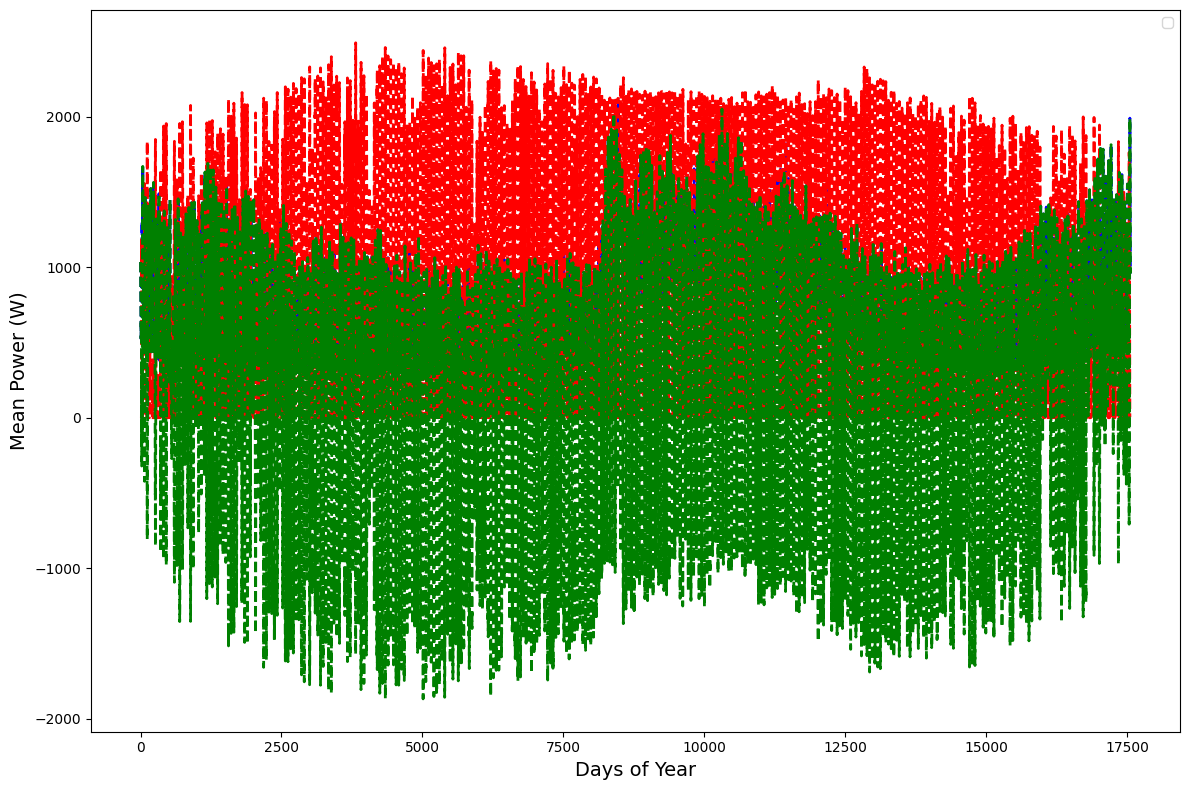

In [ ]:
### Plot yearly
# Plot Prod, Cons and Net vs days
plt.figure(figsize=(12, 8))
plt.plot( yearly_avg_df['Consumption'], linestyle='--',linewidth=2, color='blue')
plt.plot( yearly_avg_df['Production'], linestyle='--',linewidth=2, color='red')
plt.plot( yearly_avg_df['NetLoad'],  linestyle='--',linewidth=2, color='green')

# Set the labels and title
plt.xlabel('Days of Year',  fontsize=14)
plt.ylabel('Mean Power (W)',  fontsize=14)
plt.legend( labels=['Consumption', 'Production', 'NetLoad'])
plt.legend()
plt.tight_layout()  # Auto-adjust layout to prevent clipping of labels

# Show the plot
plt.show()

<Axes: xlabel='month', ylabel='Consumption'>

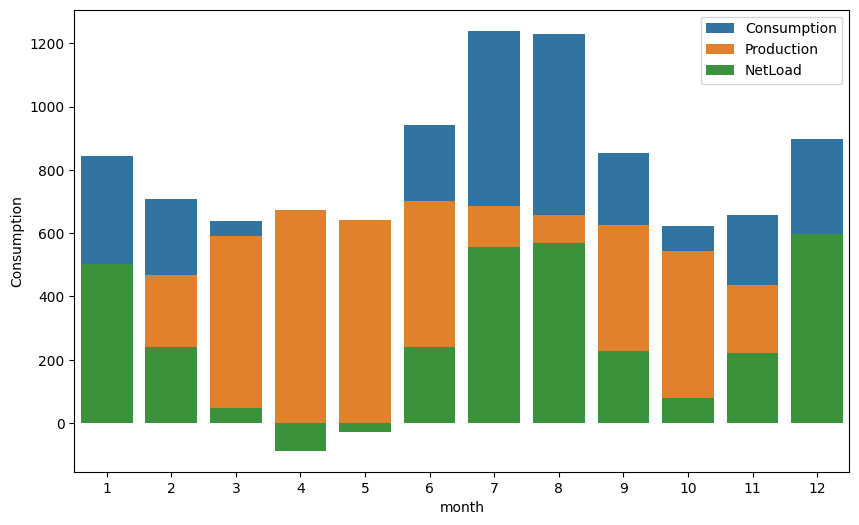

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x='month', y='Consumption', data=monthly_df, label='Consumption')
sns.barplot(x='month', y='Production', data=monthly_df, label='Production')
sns.barplot(x='month', y='NetLoad', data=monthly_df, label='NetLoad')


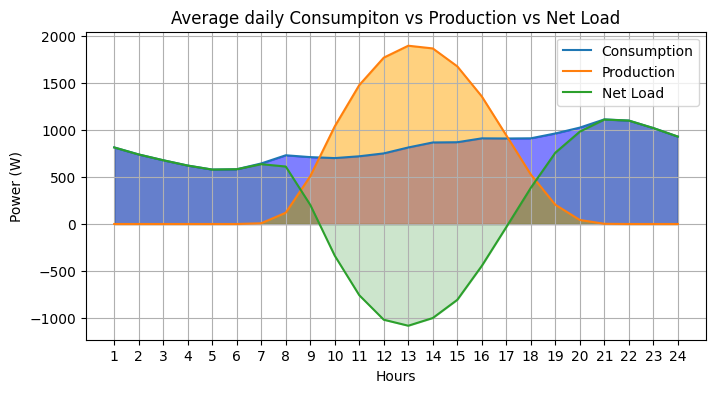

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 4))
hours = list(range(1, 25))

# Plot
plt.plot(hours, hourly_df['Consumption'], linestyle='-', label='Consumption')
plt.fill_between(hours, hourly_df['Consumption'], color='blue', alpha=0.5)  # Add shading under the Consumption curve

plt.plot(hours, hourly_df['Production'], linestyle='-', label='Production')
plt.fill_between(hours, hourly_df['Production'], color='orange', alpha=0.5)  # Add shading under the Production curve

plt.plot(hours, hourly_df['NetLoad'], linestyle='-', label='Net Load')
plt.fill_between(hours, hourly_df['NetLoad'], color='green', alpha=0.2)  # Add shading under the Net Load curve

# Set the labels and title
plt.xlabel('Hours'); plt.ylabel('Power (W)')
plt.title('Average daily Consumpiton vs Production vs Net Load')
plt.legend()
# Set custom x-axis tick labels
plt.xticks(hours);  plt.grid();
# Show the plot
plt.show();

week number: 7


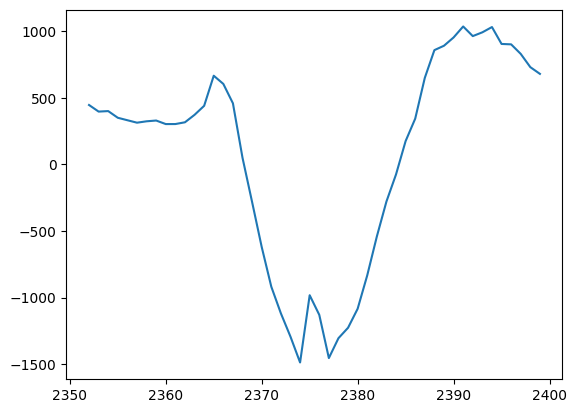

In [ ]:
#Plot Net load in a random week / random day
import random
random_number = random.randint(1, 52)
print("week number:",random_number)

week_nr = random_number
#plt.plot(yearly_avg_df['Consumption'].iloc[48*7*week_nr:48*7*(week_nr+1)])

# plot a week
#plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*(week_nr+1)])
# plot a day
plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*week_nr+48])

Interpolation for daytime. To add more points in the graph

In [ ]:
## Get the daily data in array form
Production = hourly_df['Production'].values
Consumption = hourly_df['Consumption'].values
NetLoad =  hourly_df['NetLoad'].values

In [ ]:
##  Interpolation of Load
from scipy.interpolate import interp1d
# interpolate to get values for 1440 minutes/day (24 hours = 1440 minutes)
x = np.linspace(1,24,24)
v = Consumption
xq = np.linspace(1,24,24*60)
vq = np.interp(xq, x, v)
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


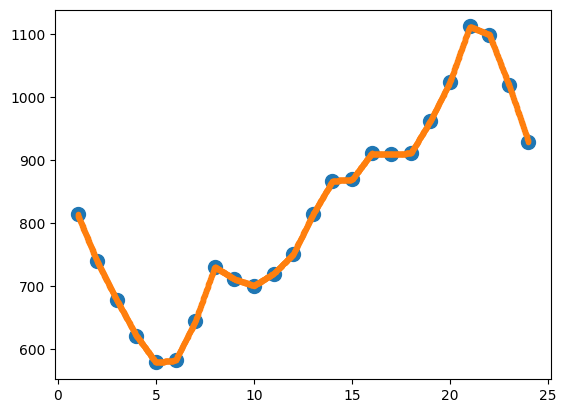

In [ ]:
# Plot interpolated
plt.plot(x, v, 'o--',  label='Consumption',markersize=10 )
plt.plot(xq, vq,  '.-.', label='Interpolated')

# Load the desired dates

In [ ]:
yearly_avg_df = yearly_avg_df.set_index('Timestamp')

In [ ]:
# Get Specific Days data
#yearly_avg_df = yearly_avg_df.set_index('Timestamp')
yearly_avg_df.index = pd.to_datetime(yearly_avg_df.index)

# Filter for ONE specific days (Example: January 1st, 2016)
specific_days_df = yearly_avg_df.loc[(yearly_avg_df.index.date == pd.to_datetime('2016-06-01').date())]

# Create a list of dates you want to filter
desired_dates = pd.to_datetime([
    '2016-07-08', '2016-07-09', '2016-07-10',
    '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14'
])

# Filter the DataFrame to only include these dates
#specific_days_df = yearly_avg_df.loc[yearly_avg_df.index.normalize().isin(desired_dates)]

# CHANGE HOURLY DATA TO SPECIFIC DAY
#specific_days_df.index = pd.to_datetime(specific_days_df.index)
hourly_df = specific_days_df.resample('H').mean()
hourly_df.info()
hourly_df.tail(20)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2016-06-01 00:00:00 to 2016-06-01 23:00:00
Freq: H
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        24 non-null     float64
 1   NM_meter     24 non-null     float64
 2   Import       24 non-null     float64
 3   Export       24 non-null     float64
 4   PV_meter     24 non-null     float64
 5   Production   24 non-null     float64
 6   Consumption  24 non-null     float64
 7   NetLoad      24 non-null     float64
 8   day          24 non-null     float64
 9   day_of_week  24 non-null     float64
 10  year         24 non-null     float64
 11  hour_of_day  24 non-null     float64
 12  quarter      24 non-null     float64
dtypes: float64(13)
memory usage: 2.6 KB


,month,NM_meter,Import,Export,PV_meter,Production,Consumption,NetLoad,day,day_of_week,year,hour_of_day,quarter
Timestamp,,,,,,,,,,,,,
2016-06-01 04:00:00,6.0,614.941176,388.391029,0.000000,586.632353,0.000000,388.391029,388.391029,1.0,2.0,2016.0,4.0,2.0
2016-06-01 05:00:00,6.0,614.941176,381.885074,0.000000,586.632353,0.004779,381.889853,381.885074,1.0,2.0,2016.0,5.0,2.0
2016-06-01 06:00:00,6.0,614.941176,426.925441,0.537059,586.632353,40.454118,466.842500,426.388382,1.0,2.0,2016.0,6.0,2.0
2016-06-01 07:00:00,6.0,615.373134,348.398810,41.584612,588.606061,241.826321,548.640519,306.814198,1.0,2.0,2016.0,7.0,2.0
2016-06-01 08:00:00,6.0,614.603904,190.751913,334.043326,589.492308,682.029696,538.738282,-143.291413,1.0,2.0,2016.0,8.0,2.0
2016-06-01 09:00:00,6.0,615.820896,130.307463,792.193284,587.597015,1233.055522,571.169701,-661.885821,1.0,2.0,2016.0,9.0,2.0
2016-06-01 10:00:00,6.0,616.743781,94.591550,1183.804063,588.298507,1686.675498,597.462985,-1089.212512,1.0,2.0,2016.0,10.0,2.0
2016-06-01 11:00:00,6.0,615.381036,62.768061,1455.862893,587.114684,2014.406657,621.311825,-1393.094832,1.0,2.0,2016.0,11.0,2.0
2016-06-01 12:00:00,6.0,614.941176,55.108971,1689.413088,586.632353,2239.297500,604.993382,-1634.304118,1.0,2.0,2016.0,12.0,2.0


In [ ]:
### Load Data #####
# For specific days
#hourly_df = hourly_df.reset_index()

# For whole year
hourly_df = yearly_avg_df.resample('H').mean().fillna(hourly_df.mean()).reset_index()

results0 = pd.read_csv('DR_optim_results.csv')

Consumption = hourly_df['Consumption']
#Consumption = results0['Cons_new']
Production = hourly_df['Production'] * 3.333333333

# Scale up the Production from 3KW to 5KW system
#Production = Production*1.67

#NetLoad =  hourly_df['NetLoad']
NetLoad =  Consumption - Production
NetLoad.head()

hours = len(Production)
timeframe = np.linspace(0,hours-1,hours)

In [ ]:
Production.max()

8200.183577611355

In [ ]:
Consumption.sum()

7202605.334347108

In [ ]:
print(hourly_df.isna().sum())
index=Production.index
index

Timestamp      0
month          0
NM_meter       0
Import         0
Export         0
PV_meter       0
Production     0
Consumption    0
NetLoad        0
day            0
day_of_week    0
year           0
hour_of_day    0
quarter        0
dtype: int64


RangeIndex(start=0, stop=8784, step=1)

# Battery Parameters

Battery Data
 https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf

https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf


In [ ]:
# Specify battery Parameters. Source
# https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf

battery_capacity = 0.99*4600 *3.5 # in Wh
max_charge_rate = 2800  *3.5 # Max charge rate in W (power)
max_discharge_rate = 0.95*4000 *3.5 # Max discharge rate in W (power)
soc_min = 0.1*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery


'''
# LG Resus 10H type-C
#https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf
battery_capacity = 0.95*9800  # in Wh
max_charge_rate = 5000  # Max charge rate in W (power)
max_discharge_rate = 0.5*7000  # Max discharge rate in W (power)
soc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery
'''


'\n# LG Resus 10H type-C\n#https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf\nbattery_capacity = 0.95*9800  # in Wh\nmax_charge_rate = 5000  # Max charge rate in W (power)\nmax_discharge_rate = 0.5*7000  # Max discharge rate in W (power)\nsoc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%\nbattery_soc = soc_min  # Initial state of charge in Wh\neff = 0.98;  # Charge/discharge Efficiency of the battery\n'

# Tariff parameters

Time-of-Use Tarriffs (Indicative)
TOU tarrifs from Australia 2017 from paper:

https://www.researchgate.net/publication/317125126_Leveraging_smart_meter_data_for_economic_optimization_of_residential_photovoltaics_under_existing_tariff_structures_and_incentive_schemes


In [ ]:
'''
#https://www.researchgate.net/publication/317125126_Leveraging_smart_meter_data_for_economic_optimization_of_residential_photovoltaics_under_existing_tariff_structures_and_incentive_schemes
# Sample TOU tariff data
tariff_data = {
    'time_period': pd.date_range(start='2016-07-08 00:00:00', end='2016-07-08 23:00:00', freq='H'),
    'tariff_rate': [0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.53, 0.53, 0.53, 0.53, 0.53, 0.21, 0.21, 0.13, 0.13]
}
'''

#https://www.researchgate.net/profile/Venizelos-Venizelou-2/publication/325718517_Residential_consumption_responsiveness_under_time-varying_pricing/links/5b1fc1e1a6fdcc69745cd1f7/Residential-consumption-responsiveness-under-time-varying-pricing.pdf
# Sample TOU tariff data By Venizelos et al.
tariff_data = {
    'time_period': pd.date_range(start='2016-05-01 00:00:00', end='2016-05-01 23:00:00', freq='H'),
   # 'tariff_rate': [0.15, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.15, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.15, 0.15, 0.15, 0.15]
    'tariff_rate': [0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.15, 0.15, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.15, 0.15, 0.15]
}

# Create the DataFrame
tariff_df = pd.DataFrame(tariff_data)
print(tariff_df )


           time_period  tariff_rate
0  2016-05-01 00:00:00         0.11
1  2016-05-01 01:00:00         0.11
2  2016-05-01 02:00:00         0.11
3  2016-05-01 03:00:00         0.11
4  2016-05-01 04:00:00         0.11
5  2016-05-01 05:00:00         0.11
6  2016-05-01 06:00:00         0.15
7  2016-05-01 07:00:00         0.15
8  2016-05-01 08:00:00         0.19
9  2016-05-01 09:00:00         0.19
10 2016-05-01 10:00:00         0.19
11 2016-05-01 11:00:00         0.19
12 2016-05-01 12:00:00         0.19
13 2016-05-01 13:00:00         0.19
14 2016-05-01 14:00:00         0.19
15 2016-05-01 15:00:00         0.19
16 2016-05-01 16:00:00         0.19
17 2016-05-01 17:00:00         0.19
18 2016-05-01 18:00:00         0.19
19 2016-05-01 19:00:00         0.19
20 2016-05-01 20:00:00         0.19
21 2016-05-01 21:00:00         0.15
22 2016-05-01 22:00:00         0.15
23 2016-05-01 23:00:00         0.15


In [ ]:
n = int(len(hourly_df['NetLoad'])/24)  # Replace with your desired number of days
tariffs_repeated = np.tile(tariff_df['tariff_rate'], n)

# Create a new DataFrame with the repeated tariffs
tariffs_repeated_df = pd.DataFrame({'tariff_rate': tariffs_repeated})
tariffs_repeated_df.mean()

# Make a new dataframe
buy_tariffs = tariffs_repeated_df['tariff_rate']

# Assume Sell prices for Net-billing scheme
sell_tariffs = 0.5*buy_tariffs.copy()

# Assume Net-Metering prices
netMet_tariffs = 0.15*buy_tariffs.copy()

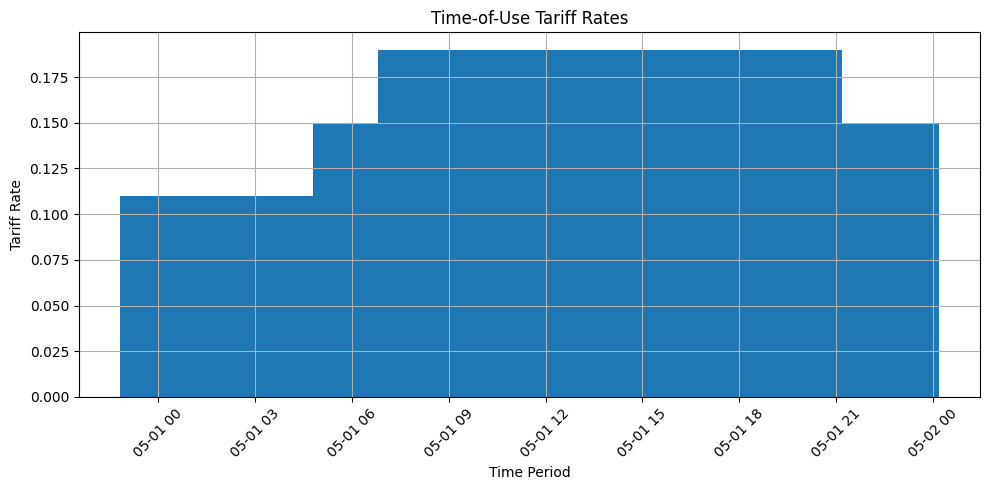

In [ ]:
# Plot the tariff rate over time as a bar plot
plt.figure(figsize=(10, 5))
plt.bar(tariff_df['time_period'], tariff_df['tariff_rate'], width=0.1)
plt.xlabel('Time Period')
plt.ylabel('Tariff Rate')
plt.title('Time-of-Use Tariff Rates')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Rule-Based charge model (self-consumption)
Simple Battery model.
Objective:
**Minimize abs(NetLoad)**
= minimize peak consumption & maximise using PV generation

In [ ]:
# Define the Rule-based controller for charging-discharging the battery

def simulate_battery_operation(pv, load, soc, capacity, charge_rate, discharge_rate, P_PV_used):
    dod = 0.1*capacity
    net_load = load - pv  # Negative if excess PV

    if net_load < 0 :  # Charge when we have Excess PV
        charge_power = 0.98*min(-net_load, charge_rate, capacity - soc)
        soc += charge_power  # Charge the battery
        P_PV_used += load
        #net_load = 0  # Set net load to zero since it's handled by PV and battery
        net_load += charge_power  #
        discharge_power = 0

    else :  # If Net Load possitive
        discharge_power = 0.98*min(net_load, discharge_rate, soc )
        if soc <= 1.5*dod:              # Min SOC is at DoD
           discharge_power = 0
           soc = dod;

        soc -= discharge_power  # Discharge the battery
        P_PV_used += pv
        net_load -= discharge_power  # Reduce net load by the discharged amount
        charge_power = 0

    return soc, net_load , P_PV_used, charge_power, discharge_power

In [ ]:
# Initialize DataFrame for results
results = pd.DataFrame(index=Production.index)
results['PV'] = Production
results['Load'] = Consumption
results['SOC'] = soc_min
results['P_PV_used'] = 0
results['Net Load'] = 0
results['Timestamp'] = hourly_df['Timestamp'].copy()


# Run simulation
for i in results.index:
    battery_soc, net_load, P_PV_used,charge_power, discharge_power = simulate_battery_operation(results.at[i, 'PV'],
                                                                  results.at[i, 'Load'],
                                                                  battery_soc,
                                                                  battery_capacity*0.88,
                                                                  max_charge_rate,
                                                                  max_discharge_rate,
                                                                  results.at[i, 'P_PV_used'])
    results.at[i, 'SOC'] = battery_soc
    results.at[i, 'Net Load'] = net_load
    results.at[i, 'P_PV_used'] = P_PV_used
    results.at[i, 'Charging'] = charge_power
    results.at[i, 'Discharging'] = discharge_power


<ipython-input-24-dd8c2e1f3bdd>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '963.5443382352942' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[i, 'Net Load'] = net_load
<ipython-input-24-dd8c2e1f3bdd>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.77083333245625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[i, 'P_PV_used'] = P_PV_used


In [ ]:
results.info()
results.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PV           8784 non-null   float64       
 1   Load         8784 non-null   float64       
 2   SOC          8784 non-null   float64       
 3   P_PV_used    8784 non-null   float64       
 4   Net Load     8784 non-null   float64       
 5   Timestamp    8784 non-null   datetime64[ns]
 6   Charging     8784 non-null   float64       
 7   Discharging  8784 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 549.1 KB


,PV,Load,SOC,P_PV_used,Net Load,Timestamp,Charging,Discharging
0,0.000000,963.544338,1402.632000,0.000000,963.544338,2016-01-01 00:00:00,0.000000,0.000000
1,0.000000,925.532426,1402.632000,0.000000,925.532426,2016-01-01 01:00:00,0.000000,0.000000
2,0.000000,839.658529,1402.632000,0.000000,839.658529,2016-01-01 02:00:00,0.000000,0.000000
3,0.000000,693.759559,1402.632000,0.000000,693.759559,2016-01-01 03:00:00,0.000000,0.000000
4,0.000000,548.466618,1402.632000,0.000000,548.466618,2016-01-01 04:00:00,0.000000,0.000000
5,0.000000,590.708162,1402.632000,0.000000,590.708162,2016-01-01 05:00:00,0.000000,0.000000
6,0.000000,615.284706,1402.632000,0.000000,615.284706,2016-01-01 06:00:00,0.000000,0.000000
7,8.770833,570.340515,1402.632000,8.770833,561.569681,2016-01-01 07:00:00,0.000000,0.000000
8,507.016048,702.059670,1402.632000,507.016048,195.043621,2016-01-01 08:00:00,0.000000,0.000000
9,2015.840547,837.623134,2557.285064,837.623134,-23.564348,2016-01-01 09:00:00,1154.653064,0.000000


# Costs estimation

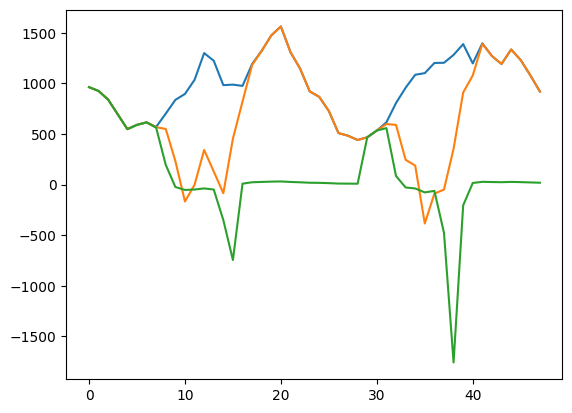

In [ ]:
plt.plot(hourly_df['Consumption'][0:48])
plt.plot(hourly_df['NetLoad'][0:48])
plt.plot(results['Net Load'][0:48])

In [ ]:
# calculate tariff costs and savings
def tariff_costs( results_bat, results_no_bat, bat_capacity, price_per_Wh):

    '''
    #price_per_Wh = 0.500 # euros
    cost_no_PV =    0.001*(buy_tariffs *  results_no_bat['Consumption'].clip(lower=0)).sum()
    cost_no_bat =   0.001*(buy_tariffs *  results_no_bat['NetLoad'].clip(lower=0)).sum()
    cost_with_bat = 0*price_per_Wh*bat_capacity + 0.001*(buy_tariffs *  results_bat['Net Load'].clip(lower=0)).sum()
    '''
    '''
    # Net Metering scheme
    cost_no_PV =    0.001*(buy_tariffs *  results_no_bat['Consumption'].clip(lower=0)).sum()
    cost_no_bat =   0.001*(buy_tariffs *  results_no_bat['NetLoad'].clip(lower=0)).sum() + 0.001*(netMet *  results_no_bat['NetLoad'].apply(lambda x: x if x < 0 else 0)).sum()
    cost_with_bat = 0.001*(buy_tariffs *  results_bat['Net Load'].clip(lower=0)).sum() + 0.001*(netMet *  results_bat['NetLoad'].apply(lambda x: x if x < 0 else 0)).sum()
    '''

    # Net billing scheme
    cost_no_PV =    0.001*(buy_tariffs *  results_no_bat['Consumption'].clip(lower=0)).sum()
    cost_no_bat =   0.001*(buy_tariffs *  results_no_bat['NetLoad'].clip(lower=0)).sum() + 0.001*(sell_tariffs *  results_no_bat['NetLoad'].apply(lambda x: x if x < 0 else 0)).sum()
    cost_with_bat = 0.001*(buy_tariffs *  results_bat['Net Load'].clip(lower=0)).sum() + 0.001*(sell_tariffs *  results_bat['Net Load'].apply(lambda x: x if x < 0 else 0)).sum()

    return  round(cost_with_bat,2) , round(cost_no_bat,2) , round(cost_no_PV,2)

cost_with , cost_without , cost_no_PV = tariff_costs( results, hourly_df , battery_capacity, 0.5 )
print("Cost with Battery $:", round(cost_with,2))
print("Cost without Battery $:", round(cost_without,2))

savings = cost_without - cost_with;
print("Saved $:", round(cost_without - cost_with,2))


Cost with Battery $: -843.11
Cost without Battery $: 465.35
Saved $: 1308.46


Net Present Value estimation

In [ ]:
years = 10;

cashflow_df = pd.DataFrame({'Cashflow': [savings] * years})

print(cashflow_df)

   Cashflow
0    596.45
1    596.45
2    596.45
3    596.45
4    596.45
5    596.45
6    596.45
7    596.45
8    596.45
9    596.45


In [ ]:
### Net Present Value estimation

def calculate_npv(cash_flows, discount_rate, initial_investment=0):
    """
    Calculate Net Present Value (NPV)

    Parameters:
    cash_flows (pd.Series or np.array): Cash flows over time
    discount_rate (float): The discount rate (as a decimal)
    initial_investment (float): The initial investment cost (default 0)

    Returns:
    float: The Net Present Value
    """

    # Convert to numpy array if it's a pandas Series
    #if isinstance(cash_flows, pd.Series):
    #   cash_flows = cash_flows.values
    cash_flows = cashflow_df.iloc[:, 0].values  # Assumes cash flows are in the first column

    # Calculate the present values
    present_values = cash_flows / (1 + discount_rate) ** np.arange(len(cash_flows))

    # Calculate NPV
    npv = np.sum(present_values) - initial_investment

    return npv

# Example usage:
# Assuming we have a pandas DataFrame 'df' with a 'cash_flow' column
savings = cost_without - cost_with;
years = 10;
cashflow_df = pd.DataFrame({'Cashflow': [savings] * years})

# Set your parameters
price_per_Wh = 0.500 # euros
initial_investment = battery_capacity*price_per_Wh;
discount_rate = 0.10  # Weighted Average Cost of Capital 10%

# Calculate NPV
npv = calculate_npv(cashflow_df, discount_rate, initial_investment)

print(f"Net Present Value: ${npv:.2f}")



Net Present Value: $-3938.08


In [ ]:
battery_capacity

15939.0

In [ ]:
import numpy as np
import pandas as pd
from scipy import optimize

def calculate_irr(cash_flows, guess=0.1):
    """
    Calculate the Internal Rate of Return (IRR)

    Parameters:
    cash_flows (np.array): Array of cash flows, where the first value is the initial investment (negative value)
    guess (float): Initial guess for the IRR (default is 0.1)

    Returns:
    float: The Internal Rate of Return
    """

    def npv(rate, cash_flows):
        return np.sum(cash_flows / (1 + rate)**np.arange(len(cash_flows)))

    # Check if the cash flows change sign
    if np.all(cash_flows <= 0) or np.all(cash_flows >= 0):
        raise ValueError("Cash flows must contain at least one positive and one negative value")

    # Use scipy's optimize.brentq to find the rate that makes NPV zero
    try:
        return optimize.brentq(npv, -0.99, 100, args=(cash_flows,))
    except ValueError:
        # If brentq fails, try with newton method
        try:
            result = optimize.newton(npv, guess, args=(cash_flows,))
            return result
        except RuntimeError:
            raise ValueError("Could not estimate IRR with given cash flows")

# Example usage:
# Assuming we have a pandas DataFrame 'df' with a 'cash_flow' column

# Extract cash flows from the DataFrame
cash_flows = cashflow_df.values

try:
    # Calculate IRR
    irr = calculate_irr(cash_flows)
    print(f"Internal Rate of Return: {irr:.2%}")
except ValueError as e:
    print(f"Error: {str(e)}")
    print("Cash flows:", cash_flows)

Error: Cash flows must contain at least one positive and one negative value
Cash flows: [[596.45]
 [596.45]
 [596.45]
 [596.45]
 [596.45]
 [596.45]
 [596.45]
 [596.45]
 [596.45]
 [596.45]]


In [ ]:
### Financial analysis : Depriciation
Total_OptNetEnergy_daily = results['Net Load'].clip(lower=0).sum()
print("Total daily Energy Consumed with Battery:", Total_OptNetEnergy_daily)

Total_NetEnergy_daily = hourly_df['NetLoad'].clip(lower=0).sum()
print("Total daily Energy Consumed without Battery:", Total_NetEnergy_daily)

el_tarriff = 0.1402  #euro / kWh
fuel_tariff = 0.1417
extra_tar = 0.08
total_tar = el_tarriff+fuel_tariff + extra_tar;

# Estimate Yearly costs:
E_Opt_Cost_year = 0.001*Total_OptNetEnergy_daily * (365*24/len(timeframe)) * total_tar
print("Yearly Energy Cost with Battery:", E_Opt_Cost_year)

E_Cost_year = 0.001*Total_NetEnergy_daily  * (365*24/len(timeframe))  * total_tar
print("Yearly Energy Cost without Battery:", E_Cost_year)

Saved = E_Cost_year - E_Opt_Cost_year
print("Yearly Energy Cost Saved:", Saved)


Total daily Energy Consumed with Battery: 563651.8394872615
Total daily Energy Consumed without Battery: 4501119.553298894
Yearly Energy Cost with Battery: 203.4282630035808
Yearly Energy Cost without Battery: 1624.5044691630803
Yearly Energy Cost Saved: 1421.0762061594996


# Define PLOT functions

In [ ]:

def plot_soc1( timeframe, results ):
    # Create the figure and axes
    plt.plot(timeframe, results['SOC'], color='orange',  label='Battery SOC (Wh)' )
    plt.plot(timeframe, results['Charging']-results['Discharging'],   label='Battery Power flow (W)')

    plt.title('Battery ')
    plt.xlabel('Hour of day', fontsize=14);
    plt.legend(loc='upper left'); plt.grid();
    #plt.ylabel('Power flow (W)', fontsize=14)
    plt.show()


def plot_soc( timeframe, results ):  # Plot with two axes
    # Create the figure and axes
    plt.figure(figsize=(8, 8))
    fig, ax1 = plt.subplots()
    ax1.plot(timeframe, results['SOC'], color='orange',  label='Battery SOC' )
    ax1.set_ylabel(' State of Charge (Wh)' , fontsize=14)
    #ax1.set_xticks(rotation=45)

    # Second axis:
    ax2 = ax1.twinx();
    #ax2.plot(timeframe, results['Charging'], color='blue',label='charge (W)',marker='o') # ,marker='o'
    #ax2.plot(timeframe, -results['Discharging'],  color='red',label='discharge (W)',marker='o')
    ax2.plot(timeframe, results['Charging']-results['Discharging'],   label='power flow (W)' )
    ax2.set_ylabel('Battery Power flow (W)', fontsize=14)
    #ax1.set_xticks()

    # Align zeros by adjusting the y-limits
    # Get the absolute maximum for scaling
    max_charge = 1.1*max(max( results['Charging']),max(results['Discharging']))
    max_soc = 1.1*np.max( results['SOC'])
    # Set the maximum limit as the greater of the max values scaled by a factor for visual alignment
    scale_factor = max_soc / max_charge
    ax1.set_ylim(-max_charge * scale_factor , max_soc)
    ax2.set_ylim(-max_charge * scale_factor , max_charge * scale_factor)

    # Customizing y-axis tick labels
    # Assume you want to customize based on some specific values or format
    ax1_tick_values = np.linspace(-1000*round(battery_capacity/1000), 1000*round(battery_capacity/1000), 9)  # Specified tick locations for SOC
    ax2_tick_values = ax1_tick_values              # Specified tick locations for power flow
    ax1.set_yticks(ax1_tick_values)
    ax1.set_yticklabels([f"{int(v)} Wh" for v in ax1_tick_values])
    ax2.set_yticks(ax2_tick_values)
    ax2.set_yticklabels([f"{int(v)} W" for v in ax2_tick_values])


    # Add grid and legend
    ax1.grid(True)
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')

    plt.title('Battery ')
    #plt.xlabel('Hour of day', fontsize=14);
    #plt.xticks(rotation=45)

    plt.show()

    #plt.ylabel('Power flow (W)', fontsize=14)

#plot_soc( hourly_df['Timestamp'], results )


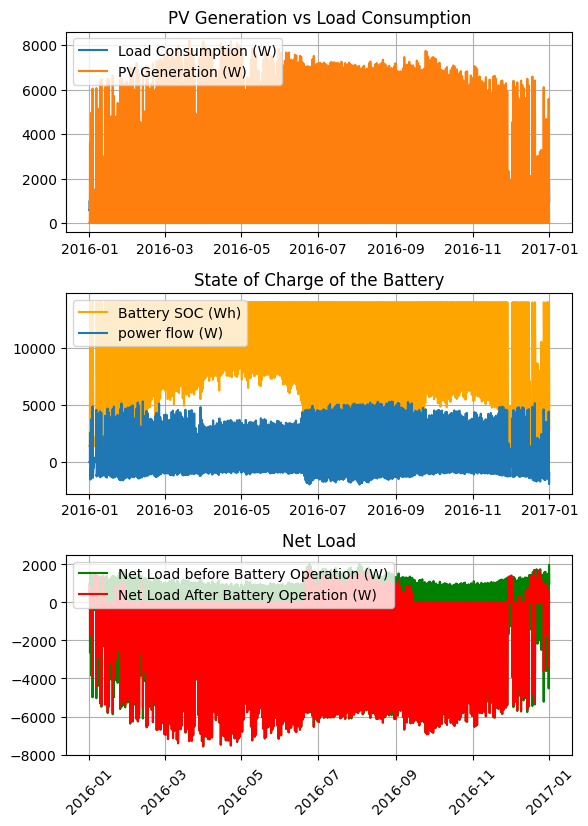

In [ ]:
#%%writefile energy_data_plotter.py
#class EnergyDataPlotter:
#    def __init__(self):
#        # Initialize with any required variables or setups
#        pass

def plot_results( timeframe, pv_data, load_data, netload_no_bat, results ):
    plt.figure(figsize=(6, 8))
    plt.subplot(3, 1, 1)
    plt.plot(timeframe, load_data  ,label='Load Consumption (W)')
    plt.plot(timeframe, pv_data , label='PV Generation (W)')
    plt.legend(loc = 'upper left')
    plt.title('PV Generation vs Load Consumption');     plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(timeframe, results['SOC'],  color='orange', label='Battery SOC (Wh)')
    plt.plot(timeframe, results['Charging']-results['Discharging'],   label='power flow (W)' )
    plt.legend(loc = 'upper left')
    plt.title('State of Charge of the Battery');     plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(timeframe, netload_no_bat ,color='green',label='Net Load before Battery Operation (W)')
    plt.plot(timeframe, results['Net Load'] , color='red',  label='Net Load After Battery Operation (W)')
    plt.legend(loc = 'upper left')
    plt.title('Net Load')
    #plt.xlabel('Hour of day', fontsize=14)
    plt.grid()

    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

plot_results(hourly_df['Timestamp'], Production, Consumption, NetLoad, results )


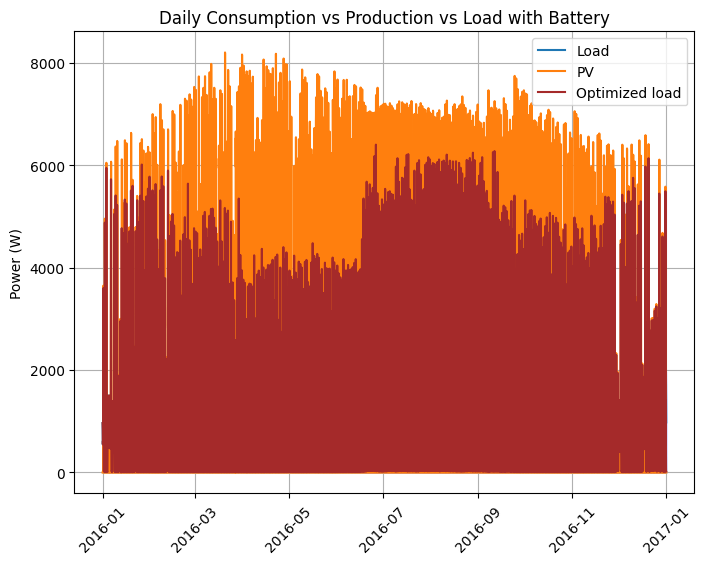

In [ ]:
def plot_results2( timeframe, pv_data, load_data, netload_no_bat, results ):
    plt.figure(figsize=(8, 6))

    # update the Consumption with the Shifted load
    Cons_new_df = load_data + results['Charging']- results['Discharging']
    # Reset the index
    #Shifted_load = Shifted_load.reset_index(drop=True)
    #hours = len(pv_data)
    #timeframe = np.linspace(0,hours-1,hours)

    plt.plot(timeframe,load_data, label='Load')
    plt.fill_between(timeframe, load_data, color='blue', alpha=0.3)  # Add shading under the curve

    plt.plot(timeframe,pv_data, label='PV')
    plt.fill_between(timeframe, pv_data, color='orange', alpha=0.3)  # Add shading

    plt.plot(timeframe,Cons_new_df, label='Optimized load', color = 'brown')
    plt.fill_between(timeframe, Cons_new_df, color='brown', alpha=0.3)  # Add shading

    #plt.plot(timeframe,  Cons_new_df - pv_data,  marker='o', label='New Net')
    #plt.plot(timeframe,  load_data - pv_data,  marker='o', label='Old Net')

    # Set the labels and title
    #plt.xlabel('Hours');
    plt.ylabel('Power (W)')
    plt.title('Daily Consumption vs Production vs Load with Battery')
    plt.legend()
    # Set custom x-axis tick labels
    plt.grid();
    # Show the plot
    plt.xticks(rotation=45)
    plt.show();

plot_results2(hourly_df['Timestamp'], Production, Consumption, NetLoad, results )


# Evaluation Metrics (SSR and SCR)

In [ ]:
E_used_pv = results['P_PV_used'].sum()
E_total_load = Consumption.sum()
E_total_pv = Production.sum()
SS_no_bat = ( E_used_pv  / E_total_load )*100
SC_no_bat = ( E_used_pv  / E_total_pv ) *100
SC_no_bat

19.583486197404508

In [ ]:
# Define evaluation metrics
def system_efficiency(pv_data, load_data, results_bat, results_no_bat):
    # Assume that results_* DataFrame contains columns for 'Net Load', 'PV Used', 'Battery Flow'
    # Make temporary local variables to estimate
    charge_from_PV = results_bat['Charging'].copy()
    discharge_from_PV = results_bat['Discharging'].copy()
    Power_PV_used = results_bat['P_PV_used'].copy();

    # Calculate Charge/discharge only from PV, and not from the grid!
    for i in range(len(results_bat)):
        if results_no_bat.at[i, 'NetLoad'] >= 0:
           charge_from_PV.at[i] = 0
        else:
           discharge_from_PV.at[i] = 0;

    # Calculate total Energy metrics
    E_total_pv = pv_data.sum()       # total energy by PVs  (Wh)
    E_total_load = load_data.sum()   # total energy by Load (Wh)
    E_total_net = E_total_pv - E_total_load  # total net (Wh)

    #E_bat = 0.5*(abs(results['Net Load'] - NetLoad)).sum()
    #E_bat = max(results_bat['SOC'])         # Assuming max SOC as total energy stored in battery
    #E_charging = results_bat['Charging'].sum()
    #E_discharging = results_bat['Discharging'].sum()
    E_charging = charge_from_PV.sum()
    E_discharging = discharge_from_PV.sum()
    E_used_pv = Power_PV_used.sum()
    E_wasted_pv = E_total_pv - E_used_pv    # Assuming E_used_pv is energy directly used by the load

    # Efficiency with battery
    # Self Sufficiency with battery
    SS_bat = (( E_used_pv +  E_discharging ) / E_total_load )*100
    # PV Self-Consumption Rate including with battery
    SC_bat = (( E_used_pv + E_charging ) / E_total_pv )*100
    # Load Coverage
    #net_load_clipped = results_bat['Net Load'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    #LC_bat = (1 - (net_load_clipped / E_total_load)) * 100

    # Efficiency without battery
    # Self Sufficiency withoutbattery
    SS_no_bat = ( E_used_pv  / E_total_load )*100
    # PV Self-Consumption Rate
    SC_no_bat = ( E_used_pv  / E_total_pv ) *100
    # Load Coverage
    #net_no_battery = results_no_bat['NetLoad'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    #LC_no_bat = (1 - (net_no_battery / E_total_load)) * 100

    efficiency_with_battery = {
        'Self Suff Rate%': round(SS_bat,2) ,
        'Self Cons Rate %':  round(SC_bat,2),
       # 'Load Coverage Ratio %': round(LC_bat ,2 )
    }
    efficiency_without_battery = {
        'Self Suff Rate%': round(SS_no_bat,2) ,
        'Self Cons Rate %': round(SC_no_bat,2),
       # 'Load Coverage Ratio %': round(LC_no_bat ,2)
    }

    return efficiency_with_battery, efficiency_without_battery

# Example usage (assuming you have the appropriate DataFrames ready)
eff_with, eff_without = system_efficiency(Production, Consumption, results , hourly_df)

print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)


Efficiency with Battery: {'Self Suff Rate%': 92.17, 'Self Cons Rate %': 38.61}
Efficiency without Battery: {'Self Suff Rate%': 44.49, 'Self Cons Rate %': 19.58}


# Battery SOH simple models

In [ ]:
'''
This model takes into account four main factors:
Number of cycles
Depth of Discharge (DoD)
Charge rate
Temperature
'''

def estimate_battery_soh(cycles, depth_of_discharge, charge_rate, temperature):
    # Initial SOH
    initial_soh = 100

    # Degradation factors
    cycle_degradation = 0.005  # 0.5% degradation per cycle
    dod_factor = 1 + (depth_of_discharge - 0.5) * 0.20    # Adjust for Depth of Discharge
    charge_rate_factor = 1 + (charge_rate - 1) * 0.15     # Adjust for charge rate
    temp_factor = 1 + (temperature - 25) * 0.01          # Adjust for temperature

    # Calculate SOH
    soh = initial_soh - (cycles * cycle_degradation * dod_factor * charge_rate_factor * temp_factor)

    return max(0, min(100, soh))  # Ensure SOH is between 0 and 100

# Example usage
cycles = 365*1
depth_of_discharge = 0.9  # 90% DoD
charge_rate = 1.5  # 1.5C charge rate
temperature = 30  # 30°C

estimated_soh = estimate_battery_soh(cycles, depth_of_discharge, charge_rate, temperature)
print(f"Estimated SOH: {estimated_soh:.2f}%")

Estimated SOH: 97.78%


In [ ]:
# Simple Models based on calendar aging and cycle aging

def calendar_aging(time, k):
  """
  Calculates the State of Health (SOH) based on calendar aging.
  Args:
    time: Time elapsed in the same units as k.
    k: Calendar aging rate.
  Returns:
    SOH: State of Health.
  """

  soh = 1 - k * time
  return soh

def cycle_aging(cycles, a, b):
  """
  Calculates the State of Health (SOH) based on cycle aging.
  Args:
    cycles: Number of cycles.
    a, b: Constants determined by fitting the model to experimental data.
  Returns:
    SOH: State of Health.
  """

  soh = 1 - a * cycles ** b
  return soh

# Example usage
time_years = 1*1
k_per_year = 0.02  # Example calendar aging rate
cycles = 1000

a = 0.00015 *time_years   # Example cycle aging constant
b = 0.7                   # Example cycle aging constant

soh_calendar = calendar_aging(time_years, k_per_year)
soh_cycle = cycle_aging(cycles, a, b)

print("SOH from calendar aging:", soh_calendar)
print("SOH from cycle aging:", soh_cycle)


SOH from calendar aging: 0.98
SOH from cycle aging: 0.9811161188230875


In [ ]:
'''
# Linear model which takes into account:
Cycle stress: Based on the number of charge-discharge cycles over the year.
Rate stress: Considers both charge and discharge rates for every hour.
SOC stress: Uses the State of Charge values for each hour.
DoD stress: Incorporates the Depth of Discharge.
Efficiency stress: Accounts for the round-trip efficiency.
'''

def estimate_battery_soh(cycles, charge_rates, discharge_rates, soc_values, capacity, dod, efficiency):
    # Convert inputs to numpy arrays for vectorized operations
    cycles = np.array(cycles)
    charge_rates = np.array(charge_rates)
    discharge_rates = np.array(discharge_rates)
    soc_values = np.array(soc_values)

    # Calculate stress factors
    cycle_stress = calculate_cycle_stress(cycles)
    rate_stress = calculate_rate_stress(charge_rates, discharge_rates)
    soc_stress = calculate_soc_stress(soc_values)
    dod_stress = calculate_dod_stress(dod)
    efficiency_stress = calculate_efficiency_stress(efficiency)

    # Combine stress factors
    total_stress = (cycle_stress + rate_stress + soc_stress + dod_stress + efficiency_stress) / 5

    # Estimate SOH
    initial_soh = 100
    degradation_rate = 0.01  ### This value should be calibrated based on historical data
    estimated_soh = initial_soh - degradation_rate * total_stress * cycles[-1]

    # Ensure the result is a scalar, not an array
    #if isinstance(estimated_soh, np.ndarray):
    #    estimated_soh = estimated_soh.item()

    return max(0, min(100, estimated_soh))

def calculate_cycle_stress(cycles):
    # Assuming higher number of cycles leads to more stress
    return cycles[-1] / np.max(cycles)

def calculate_rate_stress(charge_rates, discharge_rates):
    # Combine charge and discharge rates, assuming higher rates lead to more stress
    combined_rates = np.concatenate((charge_rates, discharge_rates))
    return np.mean(combined_rates) / np.max(combined_rates) if len(combined_rates) > 0 else 0

def calculate_soc_stress(soc_values):
    # Assume stress is higher at extreme SOC values
    return np.mean(np.abs(soc_values - 50) / 50) if len(soc_values) > 0 else 0

def calculate_dod_stress(dod):
    # Higher DoD leads to more stress
    return dod

def calculate_efficiency_stress(efficiency):
    # Lower efficiency indicates more stress
    return 1 - efficiency

# Example usage
cycles = np.arange(1, 366)  # 365 days
#charge_rates = np.random.uniform(0.1, 1, 8760)  # Hourly for a year
charge_rates = results['Charging']  # Hourly for a year
#discharge_rates = np.random.uniform(0.1, 1, 8760)
discharge_rates = results['Discharging']
#soc_values = np.random.uniform(20, 80, 8760)
soc_values = (results['SOC']/np.max(results['SOC']) )*100  # In percetage %
capacity = 100  # kWh
dod = 0.8
efficiency = 0.95

estimated_soh = estimate_battery_soh(cycles, charge_rates, discharge_rates, soc_values, capacity, dod, efficiency)
print(f"Estimated SOH: {estimated_soh:.2f}%")



Estimated SOH: 98.16%


In [ ]:
(results['SOC']/np.max(results['SOC']) )*100

,SOC
0,10.000000
1,10.000000
2,10.000000
3,10.000000
4,10.000000
...,...
8779,57.526499
8780,45.767926
8781,35.426621
8782,27.103032


In [ ]:
cycles / np.max(cycles)

array([0.00273973, 0.00547945, 0.00821918, 0.0109589 , 0.01369863,
       0.01643836, 0.01917808, 0.02191781, 0.02465753, 0.02739726,
       0.03013699, 0.03287671, 0.03561644, 0.03835616, 0.04109589,
       0.04383562, 0.04657534, 0.04931507, 0.05205479, 0.05479452,
       0.05753425, 0.06027397, 0.0630137 , 0.06575342, 0.06849315,
       0.07123288, 0.0739726 , 0.07671233, 0.07945205, 0.08219178,
       0.08493151, 0.08767123, 0.09041096, 0.09315068, 0.09589041,
       0.09863014, 0.10136986, 0.10410959, 0.10684932, 0.10958904,
       0.11232877, 0.11506849, 0.11780822, 0.12054795, 0.12328767,
       0.1260274 , 0.12876712, 0.13150685, 0.13424658, 0.1369863 ,
       0.13972603, 0.14246575, 0.14520548, 0.14794521, 0.15068493,
       0.15342466, 0.15616438, 0.15890411, 0.16164384, 0.16438356,
       0.16712329, 0.16986301, 0.17260274, 0.17534247, 0.17808219,
       0.18082192, 0.18356164, 0.18630137, 0.1890411 , 0.19178082,
       0.19452055, 0.19726027, 0.2       , 0.20273973, 0.20547

In [ ]:
np.shape(charge_rates)

(8784,)

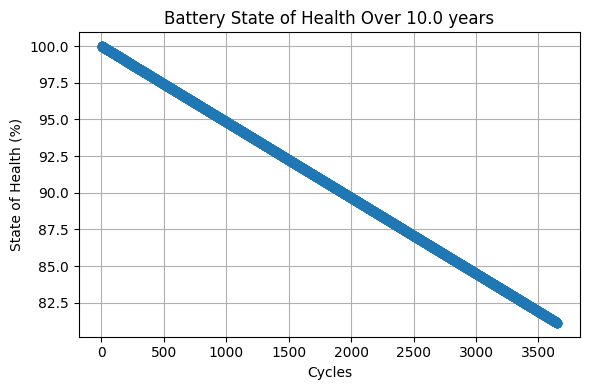

Final estimated SOH after 10.0 years: 81.13%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'''
The same model, but calculating daily SOH, to plot daily SOH over a year.
'''

def estimate_daily_soh(cycles, charge_rates, discharge_rates, soc_values, capacity, dod, efficiency):
    daily_soh = []
    initial_soh = 100  # initial SOH 100%
    degradation_rate = 0.01  # This value should be calibrated based on historical data

    for day in range(1, len(cycles) + 1):
        # Calculate stress factors up to this day
        cycle_stress = calculate_cycle_stress(cycles[:day])
        rate_stress = calculate_rate_stress(charge_rates[:day*24], discharge_rates[:day*24])
        soc_stress = calculate_soc_stress(soc_values[:day*24])
        dod_stress = calculate_dod_stress(dod)
        efficiency_stress = calculate_efficiency_stress(efficiency)

        # Combine stress factors
        total_stress = (cycle_stress + rate_stress + soc_stress + dod_stress + efficiency_stress) / 5

        # Estimate SOH for this day
        estimated_soh = initial_soh - degradation_rate * total_stress * day
        daily_soh.append(max(0, min(100, estimated_soh)))

    #return daily_soh
    return daily_soh , total_stress

def calculate_cycle_stress(cycles):
    # Assuming higher number of cycles leads to more stress
    return cycles[-1] / np.max(cycles)

def calculate_rate_stress(charge_rates, discharge_rates):
    # Combine charge and discharge rates, assuming higher rates lead to more stress
    combined_rates = np.concatenate((charge_rates, discharge_rates))
    return np.mean(combined_rates) / np.max(combined_rates) if len(combined_rates) > 0 else 0

def calculate_soc_stress(soc_values):
    # Assume stress is higher at extreme SOC values
    return np.mean(np.abs(soc_values - 50) / 50) if len(soc_values) > 0 else 0

def calculate_dod_stress(dod):
    # Higher DoD leads to more stress
    return dod

def calculate_efficiency_stress(efficiency):
    # Lower efficiency indicates more stress
    return 1 - efficiency

# Example usage
days = 365*10
cycles = np.arange(1, days+1)  # 365 days
#charge_rates = np.random.uniform(0.1, 1, days*24)  # Hourly for a year
charge_rates = results['Charging']/ np.max(results['Charging'])  # from the results of the simulation (once a day)
#discharge_rates = np.random.uniform(0.1, 1,  days*24)
discharge_rates = results['Discharging'] / np.max(results['Discharging'])
#soc_values = np.random.uniform(20, 80,  days*24)
soc_values = (results['SOC']/np.max(results['SOC']) )*100  # In percetage %
capacity = 100  # kWh
dod = 0.8
efficiency = 0.95

# Calculate daily SOH
daily_soh , total_stress = estimate_daily_soh(cycles, charge_rates, discharge_rates, soc_values, capacity, dod, efficiency)

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(cycles, daily_soh, marker='o')
plt.title(f'Battery State of Health Over {days/365} years')
plt.xlabel('Cycles')
plt.ylabel('State of Health (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final SOH
print(f"Final estimated SOH after {days/365} years: {daily_soh[-1]:.2f}%")

In [ ]:
total_stress

0.5171189223578413

In [ ]:
plt.plot(np.random.uniform(0.1, 1, 1*24))
plt.plot(results['Charging']/ np.max(results['Charging'] ) )

In [ ]:
from scipy.optimize import curve_fit

'''
# Non linear model that fits on data
def degradation_curve(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the curve to historical data
popt, _ = curve_fit(degradation_curve, historical_cycles, historical_soh)

# Use the fitted curve in the SOH estimation
estimated_soh = degradation_curve(total_stress * cycles[-1], *popt)
print(f"Estimated SOH: {estimated_soh:.2f}%")
'''

# Optimization with GEKKO library. IPOPT solver

Objective:
**Minimize abs(NetLoad)**
= minimize peak consumption & maximise using PV generation

In [ ]:
!pip install gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 75.9 MB/s eta 0:00:00


In [ ]:
from gekko import GEKKO

# Create a Gekko model
m = GEKKO(remote=False)  # Use local solving

# Battery specifications
c_bat = 0.500   # battery cost $/Wh
initial_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # round trip Efficiency of the battery

# Variables
charge = [m.Var(value=0, lb=0, ub=max_charge_rate, name=f'charge_{i}') for i in range(hours)]
discharge = [m.Var(value=0, lb=0, ub=max_discharge_rate, name=f'discharge_{i}') for i in range(hours)]
soc = [m.Var(value=initial_soc, lb=soc_min, ub=3*battery_capacity, name=f'soc_{i}') for i in range(hours)]
# To consider Bat_capacity in the Optimization, just increase the upper bounds of SOC. The opt will give the optimal bat capacity

# To increase PV system Power output, add a variable that multiplies Production
maxPV =m.Var(value=1, lb=0.3, ub=3.3)

# Initial state of charge
m.Equation(soc[0] == initial_soc + eff*charge[0] - eff*discharge[0])

# State of charge constraints for subsequent hours
for i in range(1, hours):
    m.Equation(soc[i] == soc[i-1] + eff*charge[i] - eff*discharge[i])

# Complementarity constraint: Charge and discharge cannot be non-zero simultaneously
for i in range(hours):
    m.Equation(charge[i] * discharge[i] == 0)

'''
# Battery cannot charge/discharge from/to the Grid
for i in range(hours):
    if NetLoad[i]>=0:
        m.Equation(charge[i] == 0)
    else:
        m.Equation(discharge[i] == 0)
'''

#  constraint: Charging cannot exceed production
#for i in range(hours):
#    m.Equation(eff*charge[i] + Consumption[i] <= Production[i]);

######## Objective function(s): #############

# Minimize the absolute net load
#net_load = [Consumption[i] - Production[i] + eff*charge[i] - eff*discharge[i] for i in range(hours)]
#m.Minimize(m.sum([m.abs3(net_load[i]) for i in range(hours)]))  # Using m.abs3 for absolute value


# Minimize the absolue net load considering Variable PV Power output (3-10KW)
objective = m.Intermediate(0)
for i in range(hours):
    net_load = m.Intermediate(Consumption[i] - maxPV * Production[i] + eff * charge[i] - eff * discharge[i])
    objective += m.abs3(net_load)  # Optimize SC when we have extra PV
m.Minimize(objective)


'''
# Minimize Cost considering tariffs only
#m.Minimize(m.sum([tariffs[i]*m.abs3(net_load[i]) for i in range(hours)]))

# Minimize Cost considering tariffs only. The obj is only for positive Net Load
objective = m.Intermediate(0)
for i in range(hours):
    net_load = m.Intermediate(Consumption[i] - Production[i] + eff * charge[i] - eff * discharge[i])
    if NetLoad[i] >= 0:
        objective += tariffs[i] * m.abs3(net_load) # optimise cost when we consume
    else:
        objective +=  m.abs3(net_load) # optimize SC when we have extra PV
        #objective += tariffs[i] * m.abs3(net_load)
m.Minimize(objective)
'''

'''
# Minimize Cost considering tariffs and Battery cost:
objective = m.Intermediate(0)
for i in range(hours):
    net_load = m.Intermediate(Consumption[i] - Production[i] + eff*charge[i] - eff*discharge[i])
    if NetLoad[i] >= 0:
        objective += tariffs[i] * m.abs3(net_load) # optimise cost when we consume
    else:
        #objective +=  m.abs3(net_load) # optimize SC when we have extra PV
        objective += tariffs[i] * m.abs3(net_load)
# Calculate battery cost using Intermediate
max_soc = 0
for i in range(1, hours):
    max_soc = m.max3(max_soc, soc[i])

battery_cost = m.Intermediate(c_bat * max_soc)
objective += battery_cost  # Add battery cost
m.Minimize(objective)
'''

# Solve the model
# 1 = APOPT (Advanced Process OPTimizer): Good for mixed-integer nonlinear problems.
# 2 = BPOPT: Biegler's IPOPT.
# 3 = IPOPT: Interior Point OPTimizer, good for large-scale nonlinear optimization.
m.options.SOLVER = 3  # APOPT solver for NLP
m.solve(disp=True)

# Print results
print('Charging and Discharging Schedule:')
for i in range(hours):
    print(f'Hour {i+1}: Charge = {round(charge[i].value[0])}, Discharge = {round(discharge[i].value[0])}, SOC = {round(soc[i].value[0])}')
    #print(f'Hour {i+1}: Charge = {round(charge[i].value[0])}, Discharge = {round(discharge[i].value[0])}, SOC = {round(soc[i].value[0])} , maxPV= {round(maxPV.value[0],2)}')


 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :          169
   Intermediates:           25
   Connections  :            0
   Equations    :          146
   Residuals    :          121
 
 Number of state variables:            169
 Number of total equations: -          120
 Number of slack variables: -           48
 ---------------------------------------
 Degrees of freedom       :              1
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.01 NLPi:    5 Dpth:    0 Lvs:    3 Obj:  3.30E+03 Gap:       NaN
--Integer 

In [ ]:
a = maxPV.value[0]
a

1.1513309908

In [ ]:
# Convert lists to numpy arrays
charge_array = np.array(charge).flatten()
discharge_array = np.array(discharge).flatten()
soc_array = np.array(soc).flatten()

optimized_net_load = Consumption - Production + charge_array - discharge_array
#optimized_net_load

'''
plt.plot(timeframe, charge_array,  marker='o', label='charge')
plt.plot(timeframe, -discharge_array,  marker='o', label='discharge')
#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')
plt.legend()
plt.show()
'''

"\nplt.plot(timeframe, charge_array,  marker='o', label='charge')\nplt.plot(timeframe, -discharge_array,  marker='o', label='discharge')\n#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')\nplt.legend()\nplt.show()\n"

In [ ]:
# Calculate SOC over the time period
P_PV_used = []
next_P_PV_used = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if NetLoad[i] <= 0:
       next_P_PV_used = Consumption[i]
    else:
       next_P_PV_used = Production[i]
    P_PV_used.append(next_P_PV_used)

results3 = pd.DataFrame(index=Production.index)
results3['SOC'] = soc_array
results3['Net Load'] = optimized_net_load
results3['P_PV_used'] = P_PV_used
results3['Charging'] = charge_array
results3['Discharging'] = discharge_array

# Round all numeric columns to two decimal places
results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results3)

          SOC  Net Load  P_PV_used  Charging  Discharging
0     455.400   565.086      0.000     0.000        0.000
1     455.400   453.520      0.000     0.000        0.000
2     455.400   415.991      0.000     0.000        0.000
3     455.400   405.698      0.000     0.000        0.000
4     455.400   388.391      0.000     0.000        0.000
5     455.400   381.885      0.005     0.000        0.000
6     455.400   426.388     40.454     0.000        0.000
7     455.400   306.814    241.826     0.000        0.000
8     701.904   108.243    538.738   251.534        0.000
9    1550.389   203.916    571.170   865.801        0.000
10   2894.848   282.684    597.463  1371.897        0.000
11   4592.785   339.494    621.312  1732.589        0.000
12   6565.964   379.144    604.993  2013.448        0.000
13   8538.383   388.539    677.348  2012.672        0.000
14  10409.080   370.554    658.037  1908.875        0.000
15  12051.199   331.213    622.792  1675.632        0.000
16  13172.308 

<ipython-input-189-fd41ba1abb88>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)


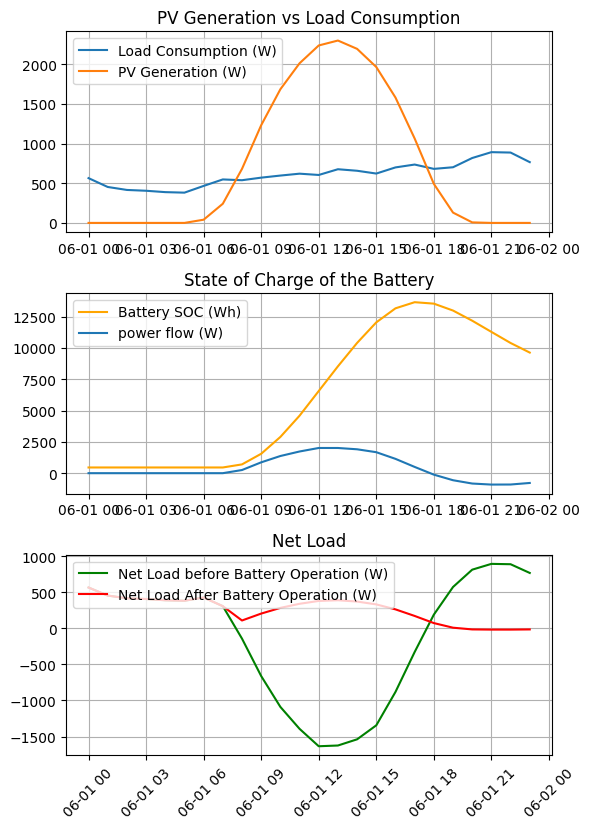

Efficiency with Battery: {'Self Suff Rate%': 77.17, 'Self Cons Rate %': 115.87}
Efficiency without Battery: {'Self Suff Rate%': 49.24, 'Self Cons Rate %': 40.5}


In [ ]:
plot_results(hourly_df['Timestamp'], Production, Consumption, NetLoad, results3 )

eff_with, eff_without = system_efficiency(Production, Consumption, results3 , hourly_df)
print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)


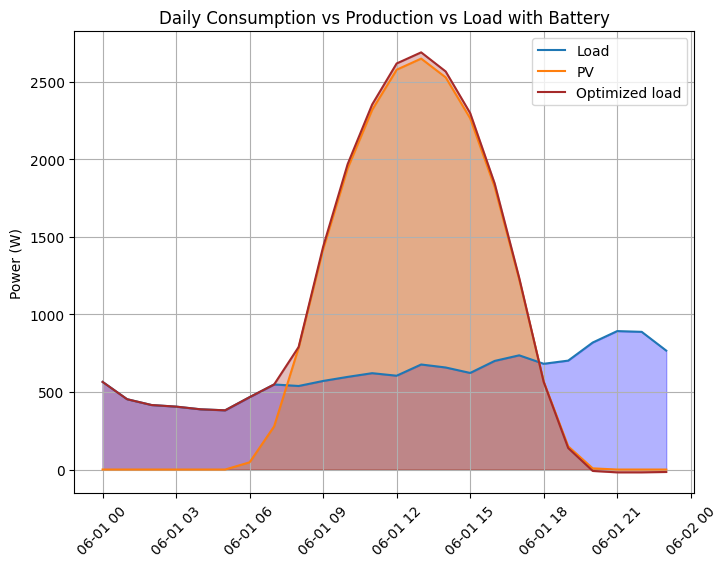

Cost with Battery $: 0.95
Cost without Battery $: 1.08
Saved $: 0.13


In [ ]:
plot_results2(hourly_df['Timestamp'], maxPV.value[0]*Production, Consumption, NetLoad, results3 )

cost_with , cost_without = tariff_costs( results3 , hourly_df, 0*np.max(soc), c_bat )
print("Cost with Battery $:",round(cost_with,2))
print("Cost without Battery $:",round(cost_without,2))
print("Saved $:",round(cost_without-cost_with,2))

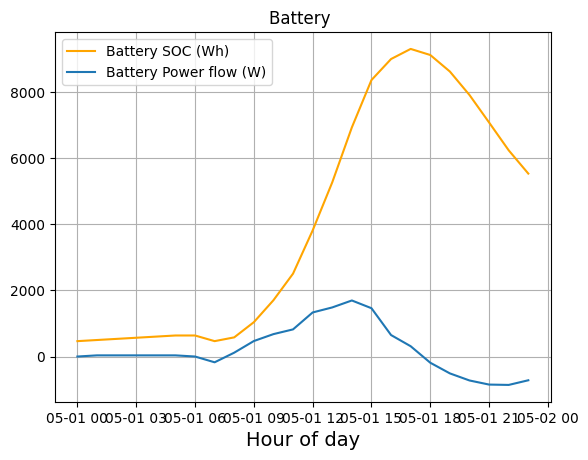

In [ ]:
#plot_soc1( hourly_df['Timestamp'] , results3 )

# Optimization (Pyomo)


In [ ]:
!pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
## Install solvers
#GLPK solver:
!apt-get install -y -qq glpk-utils
#CPLEX solver
!pip install cplex -q

#IPOPT solver
#!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
#!unzip -o -q ipopt-linux64
#COUENNE solver
!wget -N -q "https://ampl.com/dl/open/couenne/couenne-linux64.zip"
!unzip -o -q couenne-linux64
#BONMIN solver
!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64



Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [ ]:
# IPOPT solver
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
#!wget -N -q "https://ampl.com/d1/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

[ipopt-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ipopt-linux64 or
        ipopt-linux64.zip, and cannot find ipopt-linux64.ZIP, period.


In [ ]:
import pyomo.environ as pyo
from pyomo.environ import SolverFactory
from pyomo.environ import *
#!apt-get install -y -qq coinor-libipopt-dev


In [ ]:
# parameters are defined somewhere in your script
'''
battery_capacity = 0.95*9800  # in Wh
max_charge_rate = 5000  # Max charge rate in W (power)
max_discharge_rate = 0.5*7000  # Max discharge rate in W (power)
soc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery
'''

# define model
model = pyo.ConcreteModel()

# Parameters
model.tariffs = pyo.Param(range(hours), initialize=lambda model, i: tariffs[i] );

# decision variables
model.charge = Var(range(hours), domain=NonNegativeReals, bounds=(0, max_charge_rate))
charge = model.charge
model.discharge = Var(range(hours), domain=NonNegativeReals, bounds=(0, max_discharge_rate))
discharge = model.discharge
model.soc = Var(range(hours), domain=NonNegativeReals, bounds=(soc_min, battery_capacity))
soc = model.soc

# Initial state of charge
model.initial_soc_constraint = Constraint(expr= soc[0] == soc_min + eff*model.charge[0] - eff*model.discharge[0])

# Objective function: Minimize the absolute net load
def objective_rule(model):
    net_load = [Consumption[i] - Production[i] + eff*model.charge[i] - eff*model.discharge[i] for i in range(hours)]
    return sum(abs(net_load[i]) for i in range(hours))
    #return sum((net_load[i])**2 for i in range(hours))
    #return sum( model.tariffs[i] * abs(net_load[i]) for i in range(hours)); # add tariffs.
model.objective = Objective(rule=objective_rule, sense=minimize)

# Constraints for subsequent hours
def Cons1(model, i):
    if i > 0:
        return model.soc[i] == model.soc[i-1] + eff*model.charge[i] - eff*model.discharge[i]
    else:
        return soc[0] == soc_min + eff*model.charge[0] - eff*model.discharge[0]
model.Cons1 = Constraint(range(hours), rule=Cons1)

# Complementarity constraint: Charge and discharge cannot be non-zero simultaneously
def complementarity_constraint(model, i):
    return model.charge[i] * model.discharge[i] == 0
model.complementarity_constraint = Constraint(range(hours), rule=complementarity_constraint)

#  constraint: Charging cannot exceed production
def Cons3(model, i):
    return eff*model.charge[i] + Consumption[i] <= Production[i];
model.Cons3 = Constraint(range(hours), rule=complementarity_constraint)


'''
# Cannot charge batery from the grid
def Cons2(model, i):
    # Ensures that charge can only occur when production is greater than consumption
    if NetLoad[i] > 0:
        return model.charge[i] == 0;
    else:
        return model.discharge[i] == 0;
        #return model.charge[i] == model.charge[i];
model.Cons2 = Constraint(range(hours), rule=Cons2)
'''

# Solver
#solver = SolverFactory('ipopt', executable='/content/ipopt')
#solver = SolverFactory('ipopt')
#results = solver.solve(model, tee=True)

# Solver: using solver from Neos Server
import os
#os.environ['NEOS_EMAIL']='panosherodotou1992@gmail.com'
# https://neos-server.org/neos/solvers/index.html
solver = SolverManagerFactory('neos') #SolverManagerFactory should be imported instead of SolverFactory
#results4 = solver.solve(model,opt='ipopt') # soemtimes not work
#results4 = solver.solve(model,opt='minlp')  # works ok
#results4 = solver.solve(model,opt='couenne')  # Best so far
#results4 = solver.solve(model,opt='filmint')  # Also best
results4 = solver.solve(model,opt='lancelot')  #2nd best so far
#results4 = solver.solve(model,opt='knitro')  #2nd best so far

# Print the results
print(results4)
print('Charging and Discharging Schedule:')
for i in range(hours):
    print(f'Hour {i+1}: Charge = {round(value(model.charge[i]),2)}, Discharge = {round(value(model.discharge[i]),2)}, SOC = {round(value(model.soc[i]),2)}')



ERROR:pyomo.neos:Error parsing NEOS solution file  NEOS log:
Job 14416907 dispatched
password: WAqNVTRJ
---------- Begin Solver Output -----------
Condor submit: 'neos.submit'
Condor submit: 'watchdog.submit'
Job submitted to NEOS HTCondor pool.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyomo/opt/plugins/sol.py", line 41, in __call__
    return self._load(f, res, soln, suffixes)
  File "/usr/local/lib/python3.10/dist-packages/pyomo/opt/plugins/sol.py", line 83, in _load
    raise ValueError("no Options line found")
ValueError: no Options line found

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyomo/neos/plugins/kestrel_plugin.py", line 215, in _perform_wait_any
    solver_results = opt.process_output(rc)
  File "/usr/local/lib/python3.10/dist-packages/pyomo/opt/solver/shellcmd.py", line 395, in process_output
    results = self._results_re

ActionManagerError: Problem executing an event.  No results are available.

In [ ]:
# Convert pyomo Var to lists
charge = [value(model.charge[i]) for i in range(hours)]
discharge = [value(model.discharge[i]) for i in range(hours)]
soc = [value(model.soc[i]) for i in range(hours)]

# Convert lists to numpy arrays
charge_array = np.array(charge).flatten()
discharge_array = np.array(discharge).flatten()
soc_array = np.array(soc).flatten()

optimized_net_load = Consumption - Production + charge_array - discharge_array
#optimized_net_load

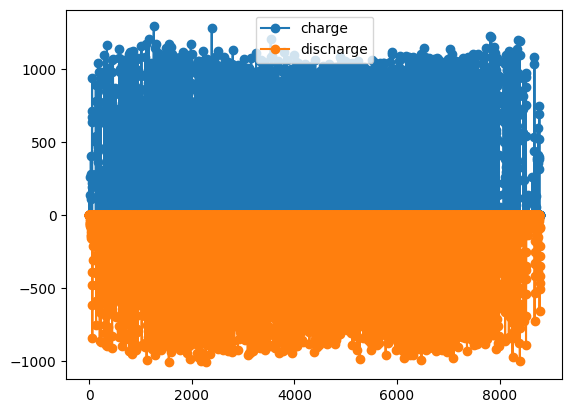

In [ ]:
plt.plot(timeframe, charge_array,  marker='o', label='charge')
plt.plot(timeframe, -discharge_array,  marker='o', label='discharge')
#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')
plt.legend()
plt.show()

In [ ]:
# Calculate SOC over the time period
P_PV_used = []
next_P_PV_used = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if NetLoad[i] <= 1e-6:
       next_P_PV_used = Consumption[i]
    else:
       next_P_PV_used = Production[i]
    P_PV_used.append(next_P_PV_used)

results4 = pd.DataFrame(index=Production.index)
results4['SOC'] = soc_array
results4['Net Load'] = optimized_net_load
results4['P_PV_used'] = P_PV_used
results4['Charging'] = charge_array
results4['Discharging'] = discharge_array

# Round all numeric columns to two decimal places
results4 = results4.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results4)

          SOC  Net Load  P_PV_used  Charging  Discharging
0      465.50    963.49        0.0       0.0         0.05
1      465.50    925.43        0.0       0.0         0.10
2      465.50    839.56        0.0       0.0         0.10
3      465.50    693.66        0.0       0.0         0.10
4      465.50    548.36        0.0       0.0         0.10
...       ...       ...        ...       ...          ...
8779  1114.99   1533.43        0.0       0.0       346.11
8780   839.96   1402.21        0.0       0.0       280.74
8781   634.83   1270.69        0.0       0.0       209.41
8782   547.14   1101.74        0.0       0.0        89.58
8783   465.50    894.76        0.0       0.0        83.41

[8784 rows x 5 columns]


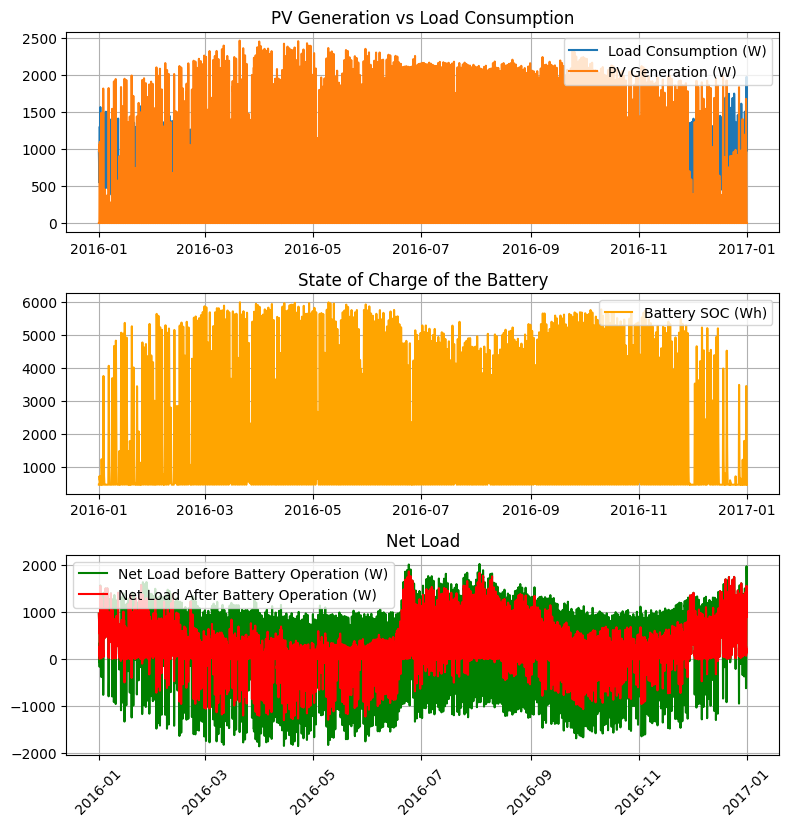

Efficiency with Battery: {'Self Suff Rate%': 59.81, 'Self Cons Rate %': 87.77}
Efficiency without Battery: {'Self Suff Rate%': 37.5, 'Self Cons Rate %': 55.04}


In [ ]:
plot_results(hourly_df['Timestamp'], Production, Consumption, NetLoad, results4 )

eff_with, eff_without = system_efficiency(Production, Consumption, results4 , hourly_df)
print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)

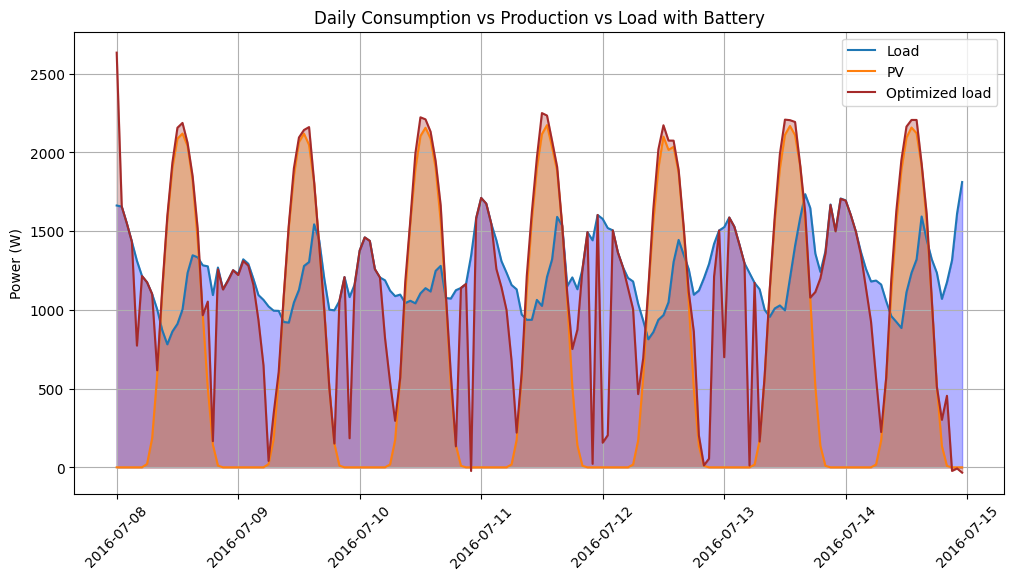

Cost with Battery $: 15.03
Cost without Battery $: 23.52
Saved $: 8.49


In [ ]:
plot_results2(hourly_df['Timestamp'], Production, Consumption, NetLoad, results4 )

cost_with , cost_without = tariff_costs( results4 ,hourly_df )
print("Cost with Battery $:",round(cost_with,2))
print("Cost without Battery $:",round(cost_without,2))
print("Saved $:",round(cost_without-cost_with,2))

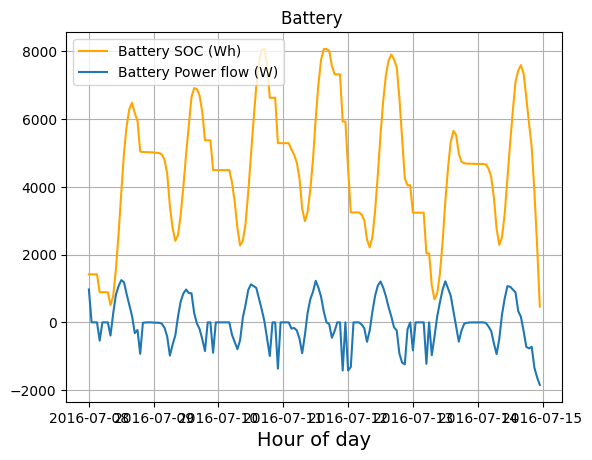

In [ ]:
plot_soc1( hourly_df['Timestamp'], results4 )

# Optimization (SciPy)
Objective:
**Minimize abs(NetLoad)**
= minimize peak consumption & maximise using PV generation

In [ ]:
from scipy.optimize import minimize


In [ ]:
# Battery specifications
initial_soc = soc_min  # Initial state of charge in Wh
battery_capacity = 0.9*4600  # in Wh

# Decision variables initialization: positive for discharge, negative for charge
initial_actions = np.zeros(2 * hours)  # x0: Initial guess for both charge and discgharge

# Define bounds
bounds = [(0, max_charge_rate) for _ in range(hours)] + [(0, max_discharge_rate) for _ in range(hours)]

# Inequality Constraints:
def constraints_ineq(actions):  # i metavlites einai to charge/discharge
    charge, discharge = actions[:hours], actions[hours:]  # Split actions into charge and discharge
    soc = initial_soc  # Start with the initial SOC
    cons = []

    for i in range(hours):
        soc += charge[i] - discharge[i]

        cons.append(battery_capacity - soc)  # SOC must not exceed capacity
        cons.append(soc - soc_min)  # SOC must not be negative
        cons.append(max_charge_rate - charge[i])  # Charge rate limit
        cons.append(max_discharge_rate - discharge[i])  # Discharge rate limit
        cons.append(charge[i])
        cons.append(discharge[i])
        #cons.append(charge[i] * discharge[i] )  # Charge and discharge cannot be non-zero simultaneously
        cons.append(charge[i] * discharge[i] ==0)  # Charge and discharge cannot be non-zero simultaneously

        #soc += charge[i] - discharge[i]
        net_load = Consumption[i] - Production[i] - discharge[i] + charge[i]
    return cons

def constraints_eq(actions):
    charge, discharge = actions[:hours], actions[hours:]  # Split actions into charge and discharge
    cons = []
    # Complementarity constraints (charge[i] * discharge[i] == 0)
    for i in range(hours):
        cons.append(charge[i] * discharge[i])
    return cons

# Constraint bounds (all constraints must be >= 0)
cons = [{'type': 'ineq', 'fun': constraints_ineq}]

#cons = [{'type': 'ineq', 'fun': constraints_ineq} ,
#        {'type': 'eq', 'fun': constraints_eq}]

# Objective function to minimize the absolute net load
def objective(actions):
    charge, discharge = actions[:hours], actions[hours:]  # Split actions into charge and discharge
    net_load = Consumption - Production + charge - discharge
    return np.sum(np.abs(net_load))  # Sum of absolute values of net loads
    #return np.sum(net_load**2)        # Sum of squared values of net loads


In [ ]:
# Optimization
options = {'maxiter': 500, 'ftol': 1e-5, 'disp': True}

#result = minimize(objective, initial_actions, method='nelder-mead', constraints=cons , options=options)
#result = minimize(objective,  initial_actions, method='SLSQP', constraints=cons , options=options)
result = minimize(objective,  initial_actions, method='BFGS', constraints=cons , options=options)
#result = minimize(objective,  initial_actions, method='CG', constraints=cons , options=options)

if result.success:
    optimized_battery_actions = result.x
    charge_opt = optimized_battery_actions[0:hours]
    discharge_opt = optimized_battery_actions[hours:2 * hours]
    optimized_net_load = Consumption - Production + charge_opt - discharge_opt
    print("Optimized Battery Actions:", optimized_battery_actions)
    print("Optimized Net Load:", optimized_net_load)
else:
    print("Optimization failed:", result.message)

plt.plot(timeframe, charge_opt,  marker='o', label='charge')
plt.plot(timeframe, -discharge_opt,  marker='o', label='discharge')
#plt.plot(ntimeframe, charge_opt-discharge_opt,  marker='o', label='net charge')
plt.legend(); plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method BFGS cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
<ipython-input-45-168a6cda4358>:6: OptimizeWarning: Unknown solver options: ftol
  result = minimize(objective,  initial_actions, method='BFGS', constraints=cons , options=options)


         Current function value: 0.000039
         Iterations: 161
         Function evaluations: 14657
         Gradient evaluations: 299
Optimization failed: Desired error not necessarily achieved due to precision loss.


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


NameError: name 'charge_opt' is not defined

In [ ]:
# Calculate SOC over the time period
P_PV_used = []
next_P_PV_used = 0
soc = [initial_soc]  # Start with the initial SOC

for i in range(hours):
    next_soc = soc[-1] + charge_opt[i] - discharge_opt[i]   # Update SOC: subtract if discharging (result.x is negative for charging)
    soc.append(next_soc)
    if NetLoad[i] < -1e-6:
       next_P_PV_used = Consumption[i]
    else:
       next_P_PV_used = Production[i]
    P_PV_used.append(next_P_PV_used)  # adding the load to previous

# Initialize DataFrame for results
results2 = pd.DataFrame(index=Production.index)

results2['SOC'] = soc[0:len(timeframe)]
results2['Net Load'] = optimized_net_load
results2['P_PV_used'] = P_PV_used
results2['Charging'] = charge_opt
results2['Discharging'] = discharge_opt

# Round all numeric columns to two decimal places
results2 = results2.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results2)


         SOC  Net Load  P_PV_used  Charging  Discharging
0    414.000   500.448      0.000     0.000        0.000
1    414.000   555.437      0.000     0.000        0.000
2    414.000   531.301      0.000     0.000        0.000
3    414.000   414.829      0.000     0.000        0.000
4    414.000   391.828      0.000     0.000        0.000
5    414.000   357.852      0.000     0.000        0.000
6    414.000   305.892      9.886     0.000        0.000
7    414.000   171.170    195.726     0.000        0.000
8    414.000  -173.778    442.736   339.403      201.286
9    552.116  -585.806    505.640   468.880       70.226
10   950.770  -689.869    705.713   468.880       70.226
11  1349.424  -761.091    863.450   468.880       70.226
12  1748.077  -811.389    907.548   468.880       70.226
13  2146.731  -838.585    835.204   468.880       70.226
14  2545.385  -907.330    521.181   468.880       70.226
15  2944.039  -830.775    494.088   468.880       70.226
16  3342.692  -675.714    578.7

In [ ]:
P_PV_used

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.885661764705882,
 195.72580542986427,
 442.7364731934732,
 505.64045454545453,
 705.7131684491978,
 863.4502205882353,
 907.5480147058823,
 835.2041911764707,
 521.1811764705883,
 494.08786764705883,
 578.7213970588235,
 524.9158088235295,
 412.01029411764705,
 75.85764705882353,
 1.9741911764705886,
 0.0,
 0.0,
 0.0]

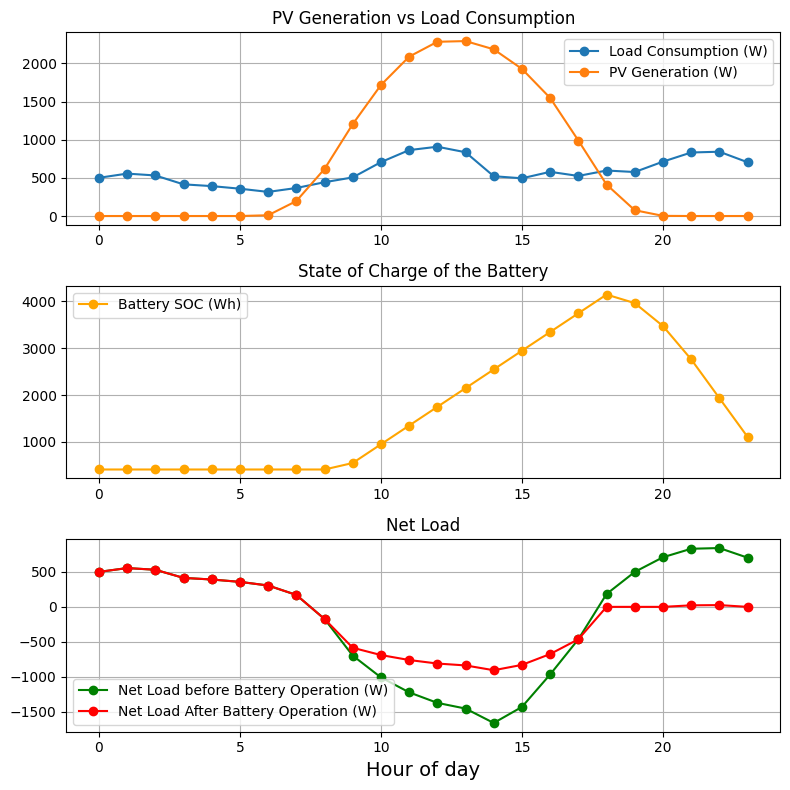

Efficiency with Battery: {'Self Sufficiency Rate%': 85.14, 'Self Consumption Rate %': 68.33, 'Load Coverage Ratio %': 76.73}
Efficiency without Battery: {'Self Sufficiency Rate%': 50.26, 'Self Consumption Rate %': 40.34, 'Load Coverage Ratio %': 50.26}


In [ ]:
# Plot results
plot_results(np.linspace(0,hours-1,hours), Production, Consumption, NetLoad, results2 )

# Example usage (assuming you have the appropriate DataFrames ready)
eff_with, eff_without = system_efficiency(Production, Consumption, results2 , hourly_df)

print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)

In [ ]:
plot_results2(timeframe, Production, Consumption, NetLoad, results2 )
